In [1]:
%%capture
!pip install plotly
!pip install nltk
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Visualisierungen
- Mean Sentiment over time per party                ✅
- HOF per MP                                        ✅
-  Männliche vs. weibliche Politiker vergleich      ✅
- Minority vergleich (überhaupt möglich?)
- Hate unter Politikern
- Wordclouds

# Data Analysis

## Plot Gender

In [3]:
df = pd.read_csv("control_group_mentions_predicted_exploded.csv")
df.head(2)

,Unnamed: 0.2,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,quote_count,...,model_predictions,mentioned_list,Unnamed: 0.1,Unnamed: 0,full_name,party,twitter,username_,Geschlecht,Gewählt in Vorperiode
0,0,1.164232e+18,MatthiasBausch3,230,9233,"Pädagoge (Ambulante Hilfen), Mitglied der ak.m...",NaN,@SilkeGebel @KonstantinNotz @ABaerbock Deutsch...,2021-08-24 21:16:26+00:00,0.0,...,0,konstantinnotz,474,474,Dr. Konstantin von Notz,Bündnis 90/Die Grünen,['http://twitter.com/KonstantinNotz'],konstantinnotz,Herrn,ja
1,1,9.598724e+17,demokratienetz,2821,94774,"Online-Redaktion, Netzwerk, Spenden: https://t...","Baden-Württemberg, Deutschland",@SilkeGebel @KonstantinNotz @ABaerbock Der Bei...,2021-08-24 21:11:30+00:00,0.0,...,0,konstantinnotz,474,474,Dr. Konstantin von Notz,Bündnis 90/Die Grünen,['http://twitter.com/KonstantinNotz'],konstantinnotz,Herrn,ja


In [4]:
frau = df[df.Geschlecht == "Frau"]
print(len(frau))
mann = df[df.Geschlecht == "Herrn"]
print(len(mann))
print(df.Geschlecht.value_counts())

289164
1218875
Herrn    1218875
Frau      289164
Name: Geschlecht, dtype: int64


In [5]:
frau_hof = frau[frau["model_predictions"] == 1]
mann_hof = mann[mann["model_predictions"] == 1]
print(len(frau_hof))
print(len(mann_hof))
# 19.6% HOF bei Frauen
# 20.8% HOF bei Männern -> hauptsächlich wegen Karl Lauterbach

# 5 höchsten Ämter:
# 1. Bundespräsident: Steinmeier
# 2. Präsident des Bundestags: Bärbel Bas
# 3. Bundeskanzler: Olaf Scholz
# 4. Bundesratspräsident: Peter Tschentscher
# 5. Präsident des Bundesverfassungsgericht: Stephan Harbarth

35854
212838


In [6]:
print(len(frau.full_name.unique()))

172


In [7]:
print(len(mann.full_name.unique()))

296


In [7]:
len(df)

2752124

In [8]:
df["HOF"] = df["model_predictions"]
df.loc[(df.model_predictions == 1),'Label']='HOF'
df.loc[(df.model_predictions == 0),'Label']='NOT'

In [9]:
df.Geschlecht.value_counts()

Herrn    1218875
Frau      289164
Name: Geschlecht, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



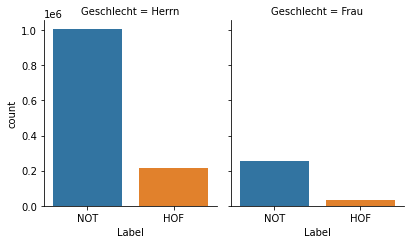

In [10]:
# Plot
g = sns.catplot("Label", col="Geschlecht", col_wrap=3,
                data=df,
                kind="count", height=3.5, aspect=.8, 
                palette='tab10')

#fig.suptitle('sf')
plt.show()
g.savefig('./plots/control_group/control_group_gender_hof_distribution.png')

In [11]:
from time_plots import plot_gender_percentage

                      0     1
model_predictions  83.5  16.5
Frau               87.6  12.4
Herrn              82.5  17.5


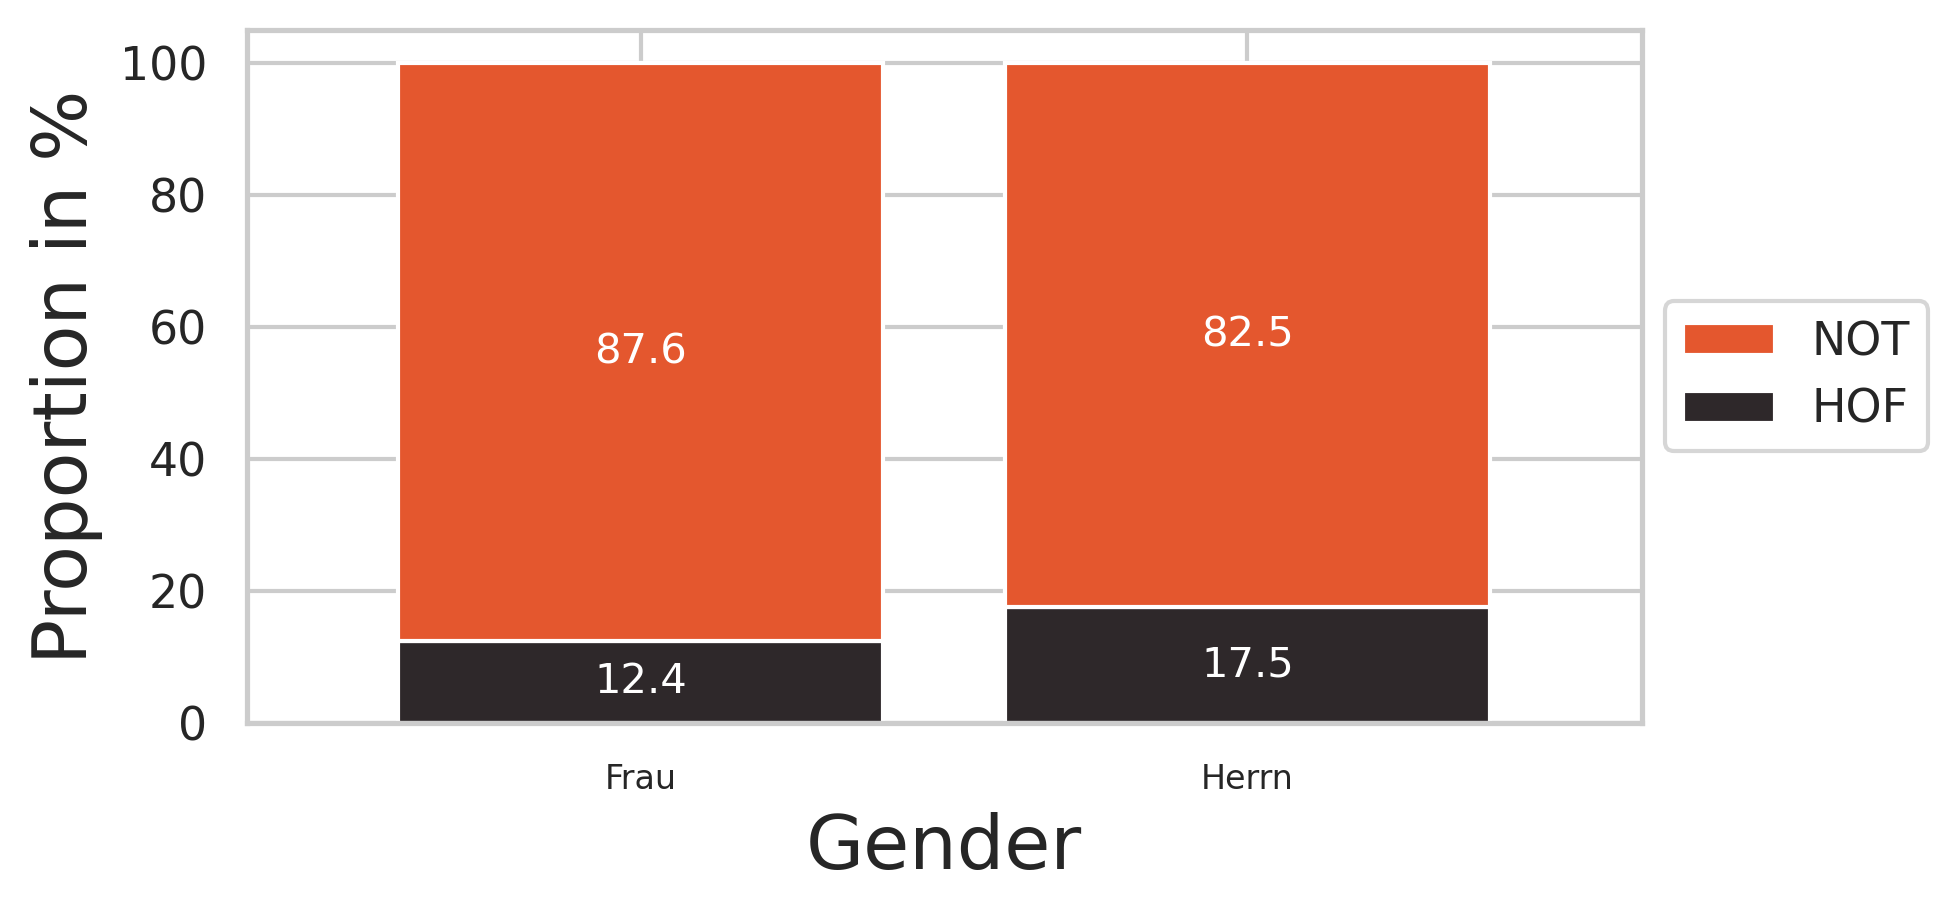

In [12]:
plot_gender_percentage(df,"./plots/control_group/control_group_gender_hof_distribution")

## Hate per MP

In [13]:
hof = df[df["Label"] == "HOF"]
no = df[df["Label"] == "NOT"]

In [14]:
hof_val_counts = pd.DataFrame(hof.full_name.value_counts())
hof_val_counts

,full_name
Prof. Dr. Karl Lauterbach,74378
Olaf Scholz,21466
Jens Spahn,14829
Friedrich Merz,11562
Paul Ziemiak,11464
...,...
Markus Herbrand,1
Helge Limburg,1
Stefan Wenzel,1
Gabriele Katzmarek,1


In [15]:
not_val_counts = pd.DataFrame(no.full_name.value_counts())
not_val_counts

,full_name
Prof. Dr. Karl Lauterbach,267807
Olaf Scholz,111332
Jens Spahn,90975
Friedrich Merz,53707
Paul Ziemiak,46513
...,...
Frank Bsirske,1
Sabine Grützmacher,1
Moritz Oppelt,1
Jan Dieren,1


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


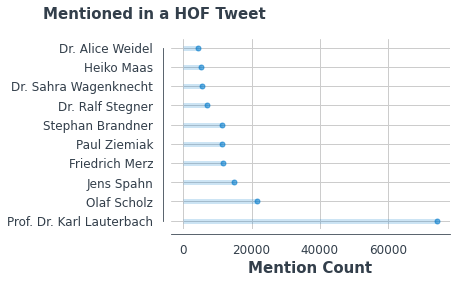

In [16]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

hof_val_counts = hof_val_counts[:10]
# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(hof_val_counts.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=hof_val_counts['full_name'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(hof_val_counts['full_name'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Mention Count', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, hof_val_counts.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Mentioned in a HOF Tweet', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
#ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig('plots/control_group/control_group_hof_on_mps.png', dpi=300, bbox_inches='tight')

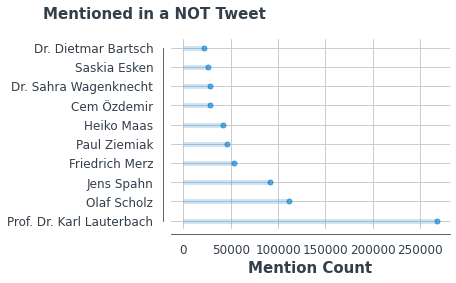

In [17]:
# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

hof_val_counts = not_val_counts[:10]
# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(hof_val_counts.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=hof_val_counts['full_name'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(hof_val_counts['full_name'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Mention Count', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, hof_val_counts.index)

# add an horizonal label for the y axis 
fig.text(-0.23, 0.96, 'Mentioned in a NOT Tweet', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
#ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig('plots/control_group/control_group_not_on_mps.png', dpi=300, bbox_inches='tight')